The work carried out herein is about finding mechanisms of forest fire propogation. The experiment supposes to understand key variables associated with this nature of forest fire propogation using already exiting empirical data, then hypothesize the mechanism, test the hypothesis using ideal conditions generated by machine learning techniques, testing the hypothesis using such ideal data and then applying real world data to the research hypothesis as appropriate.

Stage 1 is on predicting fire occurence

In [5]:
import pandas as pd

In [7]:
empirical_data = pd.read_csv("C:/Users/LENOVO/Forest fire empirical data/Cleaned_Algerian_Forest_Fire_Data.csv")
empirical_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [9]:
print(empirical_data['year'].drop_duplicates().to_string(index=False))

2012


In [11]:
empirical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [13]:
empirical_data = empirical_data[empirical_data['year']==2012]
empirical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [15]:
# Convert day and month to string first, then pad
empirical_data['day'] = empirical_data['day'].astype(str).str.zfill(2)
empirical_data['month'] = empirical_data['month'].astype(str).str.zfill(2)

# Combine to datetime
empirical_data['date'] = pd.to_datetime(
    empirical_data['year'].astype(str) + '-' +
    empirical_data['month'] + '-' +
    empirical_data['day'],
    errors='coerce'
)
print (empirical_data)


    day month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0    01    06  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1    02    06  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2    03    06  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3    04    06  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4    05    06  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ..   ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
239  26    09  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
240  27    09  2012           28  87  15   4.4  41.1   6.5     8  0.1   6.2   
241  28    09  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
242  29    09  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
243  30    09  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes       date  
0    0.5   not 

In [17]:
# Clean up the 'Classes' column just in case there are trailing spaces
empirical_data['Classes'] = empirical_data['Classes'].str.strip().str.lower()

# Split into fire and not fire
fire_data = empirical_data[empirical_data['Classes'] == 'fire'].copy()
not_fire_data = empirical_data[empirical_data['Classes'] == 'not fire'].copy()

print("🔥 Fire rows:", len(fire_data))
print("🌱 Not fire rows:", len(not_fire_data))


🔥 Fire rows: 137
🌱 Not fire rows: 106


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10892\2489918937.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10892\2489918937.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10892\2489918937.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10892\2489918937.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  p

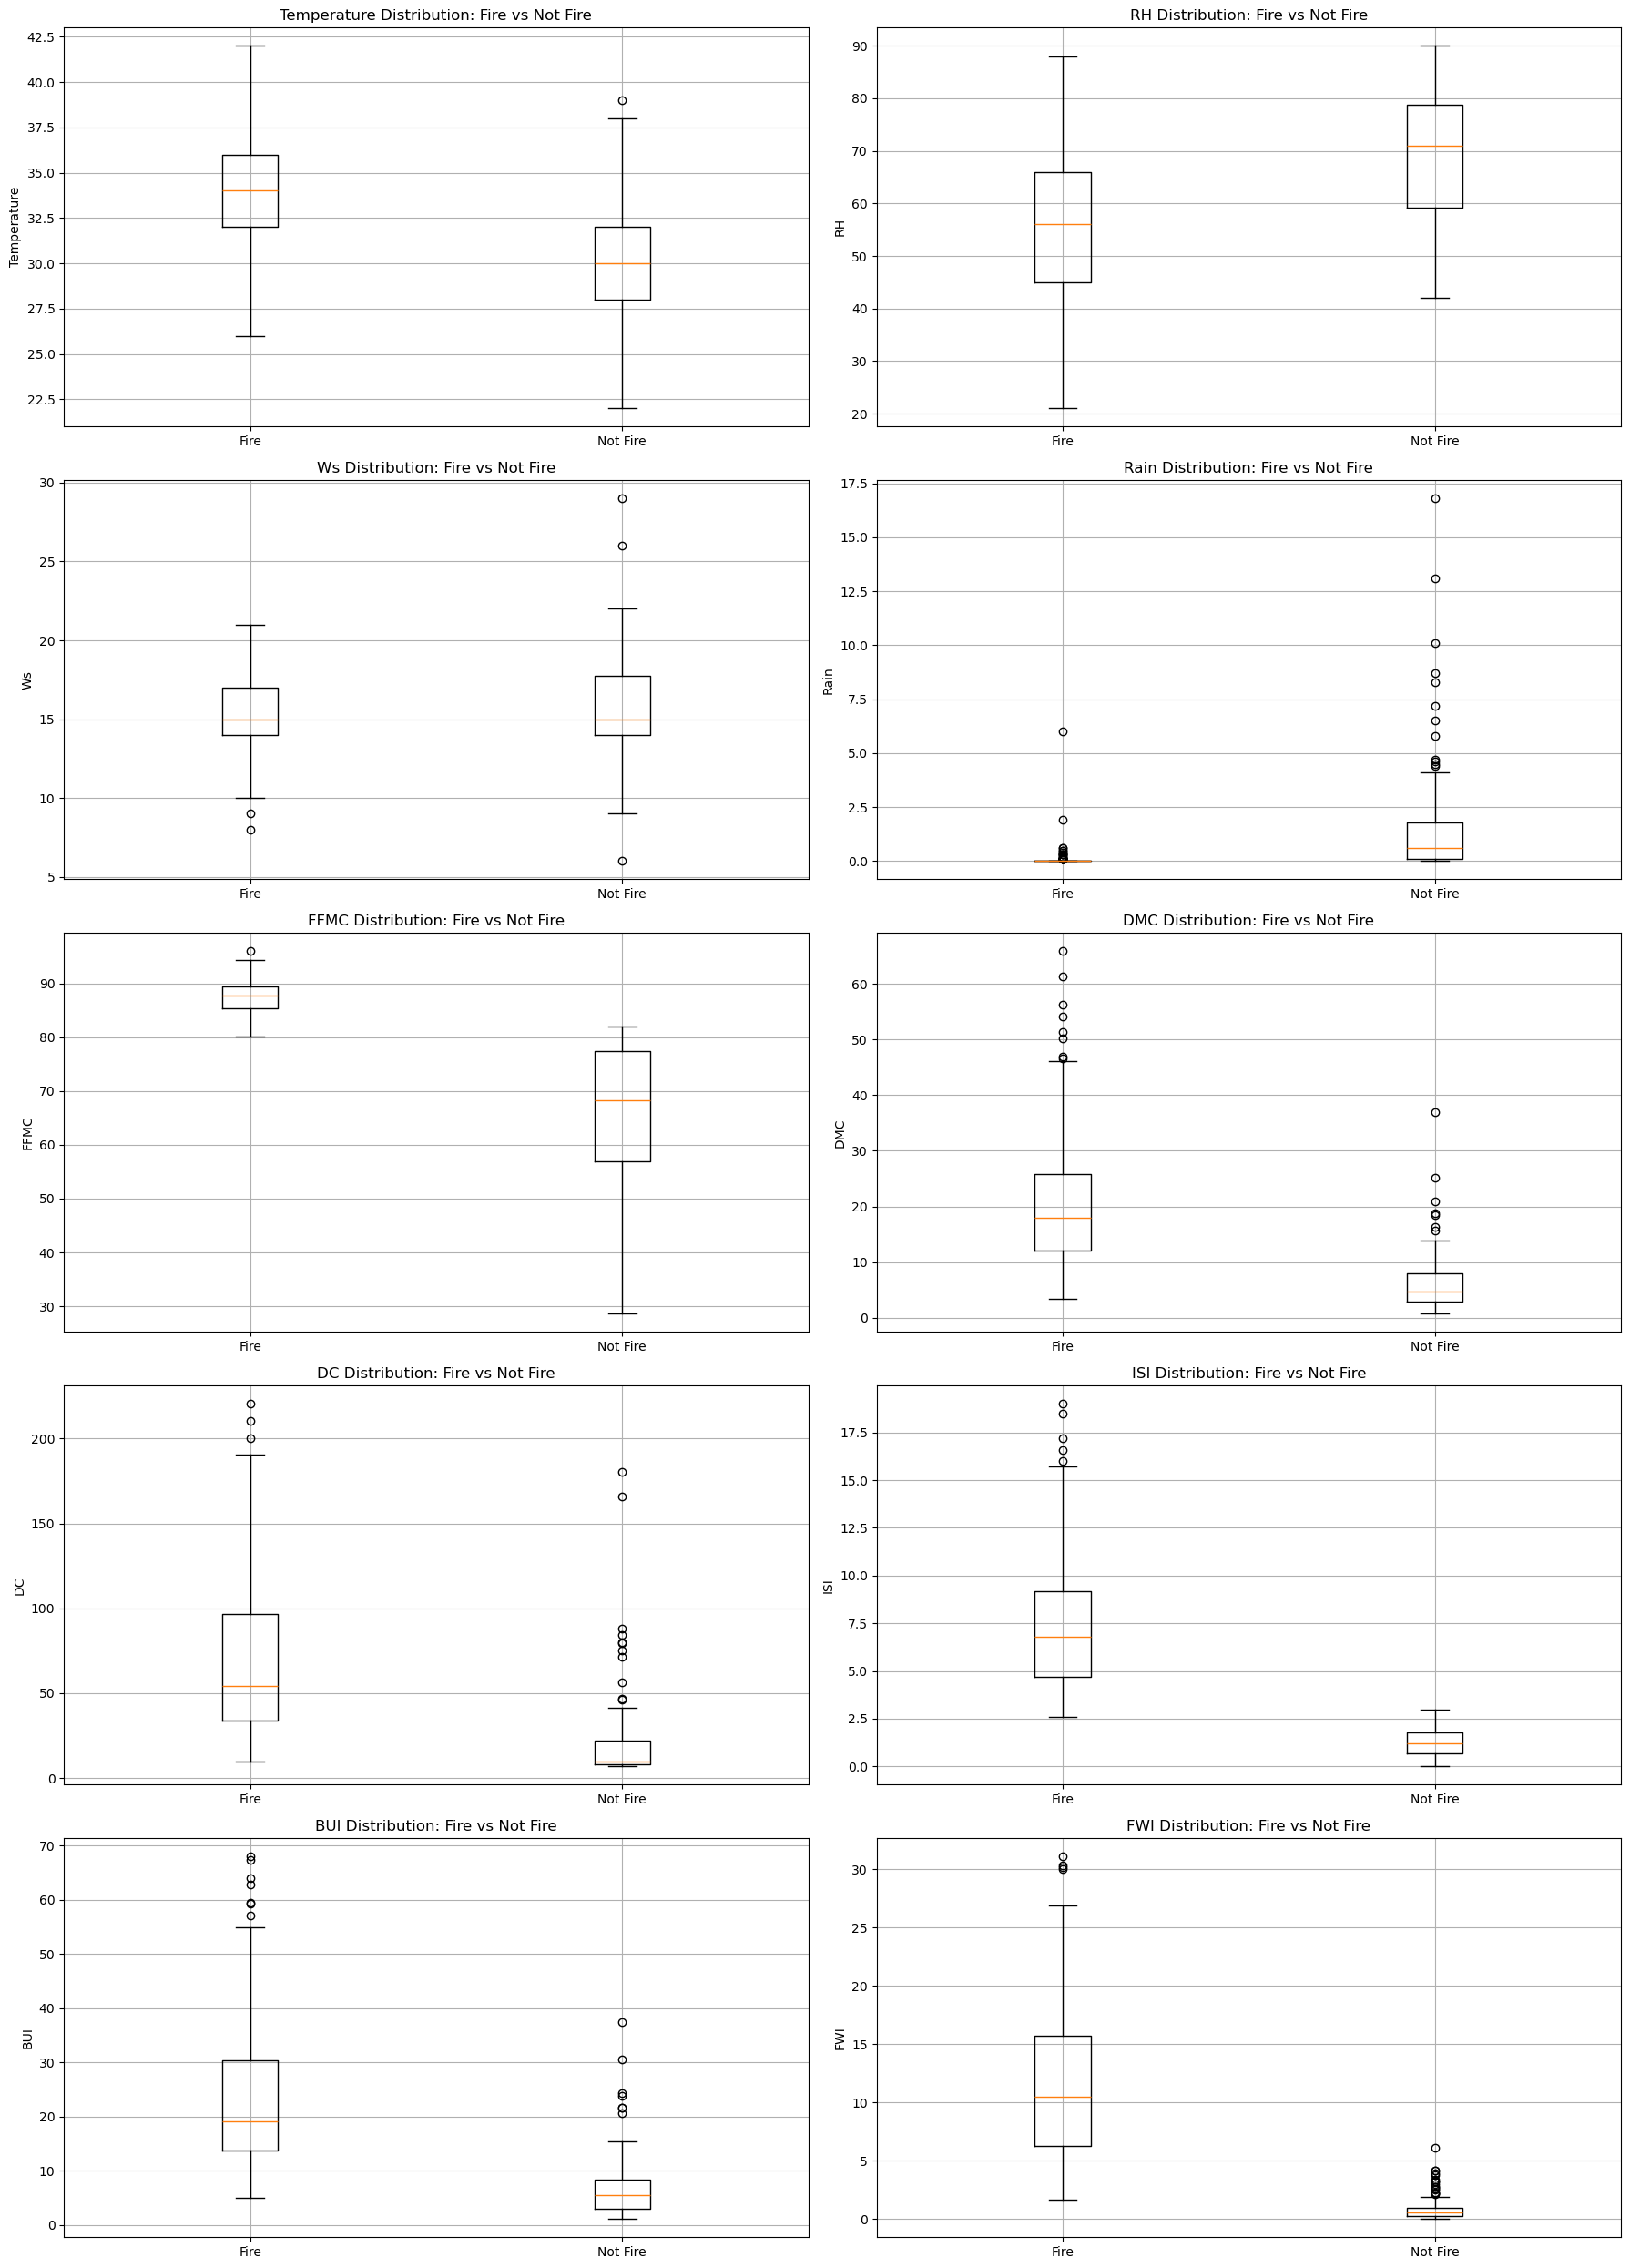

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure all relevant columns are numeric
cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for col in cols:
    empirical_data[col] = pd.to_numeric(empirical_data[col], errors='coerce')

# Ensure 'Classes' is stripped and lowercase
empirical_data['Classes'] = empirical_data['Classes'].str.strip().str.lower()

# Split data
fire_data = empirical_data[empirical_data['Classes'] == 'fire']
not_fire_data = empirical_data[empirical_data['Classes'] == 'not fire']

# Plot
plt.figure(figsize=(18, 25))
for i, col in enumerate(cols, 1):
    plt.subplot(5, 2, i)
    plt.boxplot(
        [fire_data[col].dropna(), not_fire_data[col].dropna()],
        labels=['Fire', 'Not Fire']
    )
    plt.title(f'{col} Distribution: Fire vs Not Fire')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()



Box Plotter Analysis implies that High Temperature, FFMC, DMC, DC, ISI, BUI, FWI are necessary factors for measurable fire spread while rain ensures that measurable fire does not take place.

In [24]:
empirical_data['Temperature_K'] = empirical_data['Temperature'] + 273.15
empirical_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Temperature_K
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01,302.15
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02,302.15
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03,299.15
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,2012-06-04,298.15
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05,300.15


Finding correlations for Fire vs Not Fire

In [27]:
# Step: Encode fire as 1 (measurable fire), not fire as 0
empirical_data['Classes'] = empirical_data['Classes'].str.strip().str.lower()
empirical_data['Fire_Label'] = (empirical_data['Classes'] == 'fire').astype(int)

# Step: Compute correlation of physical variables to Fire_Label
physical_vars = ['Temperature_K', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
correlation_to_fire = (
    empirical_data[physical_vars + ['Fire_Label']]
    .dropna()
    .corr()['Fire_Label']
    .drop('Fire_Label')
    .sort_values(ascending=False)
)

# Step: Display results in physics logic
print("🔥 Physical Variable Correlation with Measurable Fire Occurrence:\n")
for var, r in correlation_to_fire.items():
    meaning = "increases fire" if r > 0 else "suppresses fire"
    print(f"{var}: {r:.3f}  → {meaning}")



🔥 Physical Variable Correlation with Measurable Fire Occurrence:

FFMC: 0.769  → increases fire
ISI: 0.735  → increases fire
FWI: 0.719  → increases fire
BUI: 0.587  → increases fire
DMC: 0.586  → increases fire
Temperature_K: 0.516  → increases fire
DC: 0.511  → increases fire
Ws: -0.070  → suppresses fire
Rain: -0.379  → suppresses fire
RH: -0.432  → suppresses fire


We are clustering contributing variabes and noncontributing variables for fire vs non fire

In [30]:
from sklearn.cluster import KMeans
import pandas as pd

# Prepare
empirical_data['Temperature_K'] = empirical_data['Temperature'] + 273.15
empirical_data['Classes'] = empirical_data['Classes'].str.strip().str.lower()
empirical_data['Fire_Label'] = (empirical_data['Classes'] == 'fire').astype(int)

# Variables
physical_vars = ['Temperature_K', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
corrs = empirical_data[physical_vars + ['Fire_Label']].dropna().corr()['Fire_Label'].drop('Fire_Label')
positive_vars = corrs[corrs > 0].index.tolist()
negative_vars = corrs[corrs < 0].index.tolist()

# Clean input
cluster_df = empirical_data[positive_vars + negative_vars + ['Fire_Label']].dropna()

# Cluster each domain
pos_cluster = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(cluster_df[positive_vars])
neg_cluster = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(cluster_df[negative_vars])

# Add to frame
cluster_df['Positive_Cluster'] = pos_cluster
cluster_df['Negative_Cluster'] = neg_cluster

# Group combinations
combo_summary = cluster_df.groupby(['Positive_Cluster', 'Negative_Cluster'])['Fire_Label'].value_counts().unstack().fillna(0).astype(int)
combo_summary.columns = ['Not Fire', 'Fire']
combo_summary['Total'] = combo_summary.sum(axis=1)
combo_summary['Fire_Rate (%)'] = (combo_summary['Fire'] / combo_summary['Total'] * 100).round(1)

combo_summary





C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Not Fire  Fire  Total  Fire_Rate (%)
Positive_Cluster Negative_Cluster                                      
0                0                       73    36    109           33.0
                 1                       28    50     78           64.1
1                0                        2    19     21           90.5
                 1                        3    32     35           91.4

Eliciting the mean values of contributing variables during the fire vs non fire cluster

In [33]:
cluster_df.groupby('Positive_Cluster')[positive_vars].mean()


,Temperature_K,FFMC,DMC,DC,ISI,BUI,FWI
Positive_Cluster,,,,,,,
0,304.641979,74.979144,9.642246,27.267380,3.806417,10.456684,4.460428
1,307.507143,87.403571,31.505357,123.441071,7.867857,37.507143,15.633929


Eliciting the mean values of suppressing variables during the fire vs non fire cluster

In [38]:
# Calculate average values of negative variables for each negative cluster
negative_cluster_mean = cluster_df.groupby('Negative_Cluster')[negative_vars].mean()

# Display the DataFrame
print("Mean values of negative (fire-suppressing) variables by cluster:\n")
display(negative_cluster_mean)


Mean values of negative (fire-suppressing) variables by cluster:



,RH,Rain
Negative_Cluster,,
0,73.423077,1.086154
1,48.946903,0.391150


Running an inteligent neural network with already elicited insights

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# --- Ensure clusters are embedded ---
empirical_data['Positive_Cluster'] = np.nan
empirical_data['Negative_Cluster'] = np.nan
empirical_data.loc[cluster_df.index, 'Positive_Cluster'] = cluster_df['Positive_Cluster']
empirical_data.loc[cluster_df.index, 'Negative_Cluster'] = cluster_df['Negative_Cluster']

# --- Define physical variables and compute correlations ---
physical_vars = ['Temperature_K', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
corrs = empirical_data[physical_vars + ['Fire_Label']].dropna().corr()['Fire_Label'].drop('Fire_Label')

# --- Apply correlation-adjusted scaling ---
adjusted_df = empirical_data[['Positive_Cluster', 'Negative_Cluster', 'Fire_Label'] + physical_vars].dropna().copy()
for var in physical_vars:
    adjusted_df[var + '_adj'] = adjusted_df[var] * corrs[var]

# --- Prepare input set ---
adjusted_features = ['Positive_Cluster', 'Negative_Cluster'] + [v + '_adj' for v in physical_vars]
X = adjusted_df[adjusted_features]
y = adjusted_df['Fire_Label']

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train neural net ---
nn = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

# --- Predict class and probability ---
y_pred = nn.predict(X_test)
probs = nn.predict_proba(X_test)[:, 1]

# --- Output ---
print("🔥 Correlation-Adjusted Neural Network Report:\n")
print(classification_report(y_test, y_pred, target_names=['Not Fire', 'Fire']))



🔥 Correlation-Adjusted Neural Network Report:

              precision    recall  f1-score   support

    Not Fire       0.91      0.91      0.91        22
        Fire       0.93      0.93      0.93        27

    accuracy                           0.92        49
   macro avg       0.92      0.92      0.92        49
weighted avg       0.92      0.92      0.92        49



Dropping low correlation 

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# --- Ensure cluster columns are set ---
empirical_data['Positive_Cluster'] = np.nan
empirical_data['Negative_Cluster'] = np.nan
empirical_data.loc[cluster_df.index, 'Positive_Cluster'] = cluster_df['Positive_Cluster']
empirical_data.loc[cluster_df.index, 'Negative_Cluster'] = cluster_df['Negative_Cluster']

# --- Prepare correlation-filtered top physical variables ---
physical_vars = ['Temperature_K', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
corrs = empirical_data[physical_vars + ['Fire_Label']].dropna().corr()['Fire_Label'].drop('Fire_Label')
top_vars = corrs.abs().sort_values(ascending=False).head(4).index.tolist()

# --- Define final feature set ---
input_features = ['Positive_Cluster', 'Negative_Cluster'] + top_vars
nn_df = empirical_data2[input_features + ['Fire_Label']].dropna()

# --- Split features and labels ---
X = nn_df[input_features]
y = nn_df['Fire_Label']

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train shallow neural network ---
nn = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

# --- Predict class and probability ---
y_pred = nn.predict(X_test)
probs = nn.predict_proba(X_test)[:, 1]

# --- Classification report ---
print("🔥 Neural Network Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Not Fire', 'Fire']))

# --- Mean values of inputs grouped by fire state ---
means_by_class = nn_df.groupby('Fire_Label')[input_features].mean()
print("\n📈 Mean Input Values by Fire State (0 = Not Fire, 1 = Fire):")
display(means_by_class)


NameError: name 'empirical_data2' is not defined

Correlations filtered

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Ensure cluster info
empirical_data['Positive_Cluster'] = np.nan
empirical_data['Negative_Cluster'] = np.nan
empirical_data.loc[cluster_df.index, 'Positive_Cluster'] = cluster_df['Positive_Cluster']
empirical_data.loc[cluster_df.index, 'Negative_Cluster'] = cluster_df['Negative_Cluster']

# Step 2: Define and clean variable list
physical_vars = ['Temperature_K', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Ws']
filtered_vars = [v for v in physical_vars if v != 'Ws']

# Step 3: Correlation-based filtering
corrs = empirical_data[filtered_vars + ['Fire_Label']].dropna().corr()['Fire_Label'].drop('Fire_Label')
retained_vars = corrs[(corrs > 0.3) | (corrs < -0.3)].index.tolist()

# Step 4: Define full feature set
input_features = ['Positive_Cluster', 'Negative_Cluster'] + retained_vars
nn_df = empirical_data[input_features + ['Fire_Label']].dropna()

# Step 5: Split
X = nn_df[input_features]
y = nn_df['Fire_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train neural network
nn = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

# Step 7: Predict and report
y_pred = nn.predict(X_test)
probs = nn.predict_proba(X_test)[:, 1]
print("🔥 Final Neural Network Report (|corr| > 0.3 + Clusters):\n")
print(classification_report(y_test, y_pred, target_names=['Not Fire', 'Fire']))



🔥 Final Neural Network Report (|corr| > 0.3 + Clusters):

              precision    recall  f1-score   support

    Not Fire       0.95      0.95      0.95        22
        Fire       0.96      0.96      0.96        27

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



In [52]:
#using PyTorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 1: Define final input variables (replace with your actual retained list if different)
input_features = ['Positive_Cluster', 'Negative_Cluster', 'FFMC', 'ISI', 'FWI', 'BUI']
df_final = empirical_data[input_features + ['Fire_Label']].dropna()

# Step 2: Prepare data
X = df_final[input_features].values
y = df_final['Fire_Label'].values

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Step 4: Dataset + Dataloader
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16)

# Step 5: Define model
class FirePredictor(nn.Module):
    def __init__(self, input_dim):
        super(FirePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = FirePredictor(input_dim=X.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Step 6: Train
for epoch in range(200):
    model.train()
    for xb, yb in train_loader:
        preds = model(xb)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Step 7: Evaluate
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        probs = model(xb)
        preds = (probs >= 0.5).float()
        all_preds.extend(preds.numpy())
        all_labels.extend(yb.numpy())

print("\n🔥 PyTorch Neural Network Report on Current Dataset:\n")
print(classification_report(all_labels, all_preds, target_names=["Not Fire", "Fire"]))



🔥 PyTorch Neural Network Report on Current Dataset:

              precision    recall  f1-score   support

    Not Fire       0.90      0.90      0.90        21
        Fire       0.93      0.93      0.93        28

    accuracy                           0.92        49
   macro avg       0.92      0.92      0.92        49
weighted avg       0.92      0.92      0.92        49



In [54]:
torch.save(model.state_dict(), "fire_model.pt")
